In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from loader import load_data, load_testing_no_labels

In [28]:
# Import data
(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_data(features_path ="training.npy", labels_path = "training_labels.npy")

X, y = np.vstack((X_train, X_val, X_test)), np.concatenate((y_train, y_val, y_test))

X_test_no_labels = load_testing_no_labels(feature_path="test.npy")

# Set label categories
label_categories = {0: 'Other',
                    1: 'Music',
                    2: 'Human voice',
                    3: 'Engine sounds',
                    4: 'Alarm'}

Use this function only to get the final label predictions of the unknown labels.


## Summary statistics

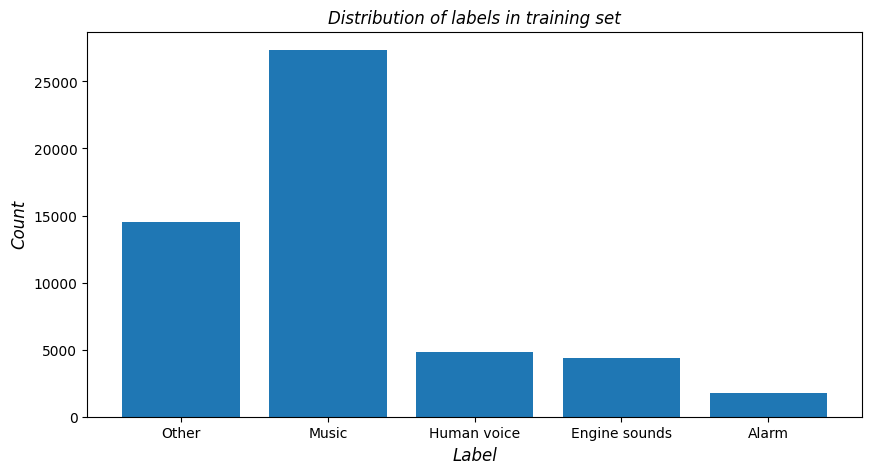

In [29]:
label, counts = np.unique(y, return_counts=True)

fig, axs = plt.subplots(1, figsize=(10, 5))
plt.bar(label_categories.values(), counts)
plt.title("Distribution of labels in training set", fontsize=12, fontstyle='oblique')
plt.xlabel("Label", fontsize=12, fontstyle='oblique')
plt.ylabel("Count", fontsize=12, fontstyle='oblique')
plt.savefig("figures/class_dist_training.png")
plt.show()

Number of training samples: 52890 (90.82%), Number of test samples: 5347 (9.18%)


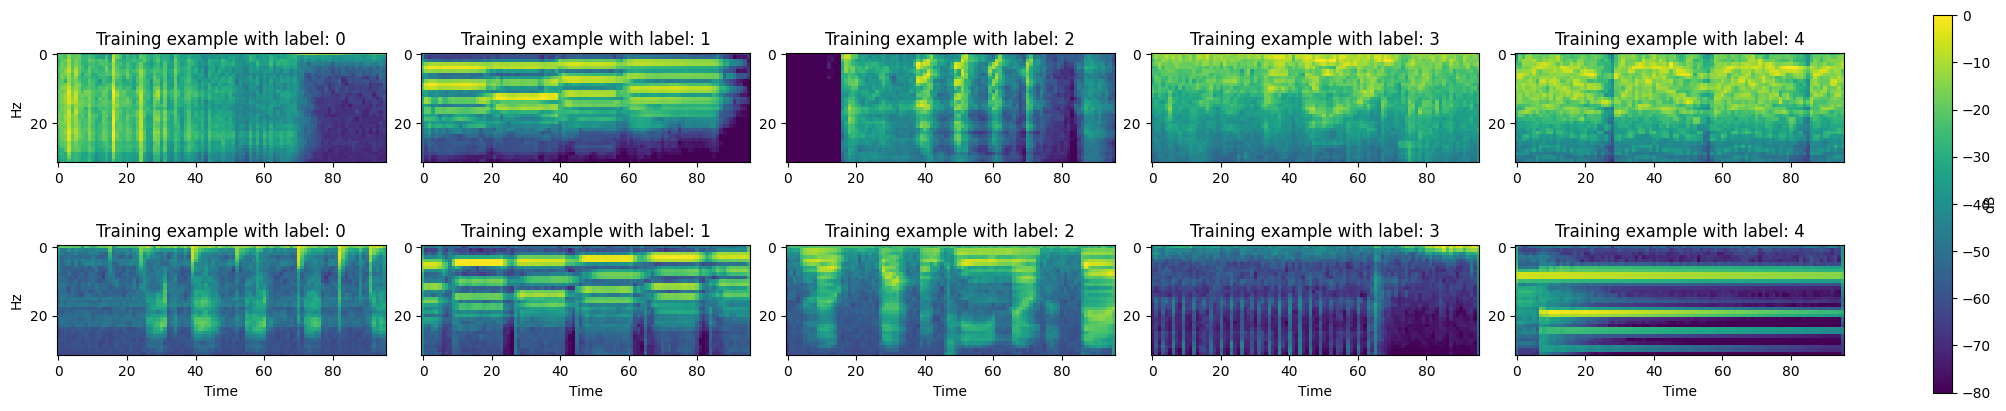

In [46]:
print(f"Number of training samples: {X.shape[0]} ({np.round(100*X.shape[0]/(X.shape[0]+X_test_no_labels.shape[0]),2)}%),",
        f"Number of test samples: {X_test_no_labels.shape[0]} ({np.round(100*X_test_no_labels.shape[0]/(X.shape[0]+X_test_no_labels.shape[0]),2)}%)")

fig, axs = plt.subplots(2, 5, figsize=(20, 4), constrained_layout=True)
for i in range(5):
        # Find 2 examples for the current label
        e = np.where(y == i)[0][:2]

        # Plot the examples
        im = axs[0][i].imshow(X[e[0]], vmin=-80, vmax=0)
        axs[0][i].set_title(f"Training example with label: {y[e[0]]}")
        im = axs[1][i].imshow(X[e[1]], vmin=-80, vmax=0)
        axs[1][i].set_title(f"Training example with label: {y[e[1]]}")
        axs[1][i].set_xlabel("Time")

# add "Hz" to the y-axis labels
axs[0][0].set_ylabel("Hz")
axs[1][0].set_ylabel("Hz")

# add "dB" to colorbar ticks
cbar = axs[0][0].figure.colorbar(im, ax=axs.ravel().tolist())
cbar.ax.set_ylabel("dB", rotation=90, va="bottom")

plt.savefig("figures/examples.png")
plt.show()

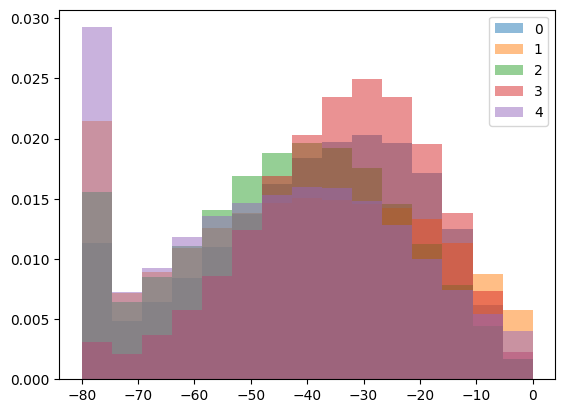

In [47]:
for i in range(5):
    label_mask = y == i
    category = X[label_mask].flatten()
    plt.hist(category, alpha=0.5, label=i, density=True, bins=15)

plt.legend()
plt.show()